In [1]:
import torchvision
import cv2
import numpy as np
from PIL import Image
import torchvision.transforms as T
import torch

In [7]:
from matplotlib import pyplot as plt

In [8]:
def visualize_detection_result(img_path, boxes, labels, scores):
    print('Visualize detected object')
    img_pil = Image.open(img_path).convert("RGB")
    image_up = np.array(img_pil).astype(np.float32) / 255.
    x_img = image_up
    im_show = cv2.cvtColor(x_img, cv2.COLOR_RGB2BGR)
    
    for j in range(len(boxes)):
        label_list = list(coco_labels_map.keys())
        color_array = coco_colors_array
        
        x_min = int(boxes[j][0])
        y_min = int(boxes[j][1])
        x_max = int(boxes[j][2])
        y_max = int(boxes[j][3])
        
        cv2.rectangle(im_show,
                      pt1 = (x_min, y_min),
                      pt2 = (x_max, y_max),
                      color = color_array[labels[j]],
                      thickness = 2)
        
        text_size = cv2.getTextSize(text=label_list[labels[j]] + ' {:.2f}'.format(scores[j].item()),
                                    fontFace=cv2.FONT_HERSHEY_PLAIN,
                                    fontScale=1,
                                    thickness=1)[0]
        
        cv2.rectangle(im_show,
                      pt1=(x_min, y_min),
                      pt2=(x_min + text_size[0] + 3, y_min + text_size[1] + 4),
                      color=color_array[labels[j]],
                      thickness=-1)
        
        cv2.putText(im_show,
                    text=label_list[labels[j]] + ' {:.2f}'.format(scores[j].item()),
                    org=(x_min + 10, y_min + 10),  # must be int
                    fontFace=0,
                    fontScale=0.4,
                    color=(0, 0, 0))
    im_show = cv2.cvtColor(im_show, cv2.COLOR_BGR2RGB)
    plt.imshow(im_show)
    plt.show()
    #cv2.imshow('result', im_show)
    #cv2.waitkey(0)

    return 0
    


In [9]:
def visualize_detection_result_without_label(img_path, boxes, labels, scores):
    print('Visualize detected object without label')
    img_pil = Image.open(img_path).convert("RGB")
    image_up = np.array(img_pil).astype(np.float32) / 255.
    x_img = image_up
    im_show = cv2.cvtColor(x_img, cv2.COLOR_RGB2BGR)
    
    for j in range(len(boxes)):
        color_array = coco_colors_array
        
        x_min = int(boxes[j][0])
        y_min = int(boxes[j][1])
        x_max = int(boxes[j][2])
        y_max = int(boxes[j][3])
        
        cv2.rectangle(im_show,
                      pt1 = (x_min, y_min),
                      pt2 = (x_max, y_max),
                      color = color_array[labels[j]],
                      thickness = 2)
        
    im_show = cv2.cvtColor(im_show, cv2.COLOR_BGR2RGB)
    plt.imshow(im_show)
    plt.show()

    return 0
    


In [28]:
def demo(img_path, threshold):
    print('Start demo()')
    print('Loading image')
    
    device = (
    "cuda"
    )
    
    print(f'Using device : {device}')
    img_pil = Image.open(img_path).convert("RGB")
    transform = T.Compose([T.ToTensor()])
    img = transform(img_pil)
    img = img.to(device)
    batch_img = [img]
    
    print('loading model...')
    model = torch.load("./fasterrcnn_restnet50_fpn.path")
    if not model:
        print('There is no saved model. Download faster-R_CNN_ResNet50_fpn model')
        model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    
    model = model.to(device)
    model.eval()
    print("Predict image from loaded model...")
    pred = model(batch_img)
    print('Predict finish')
    return pred

In [29]:
coco_labels_list = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
        'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
        'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
        'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
        'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
        'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
        'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
        'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
        'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
        'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
        'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
        'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]


In [30]:
coco_labels_map = {k:v for v, k in enumerate(coco_labels_list)}

In [31]:
np.random.seed(1)

In [32]:
coco_colors_array = np.random.randint(256, size=(91, 3)) / 255

In [33]:
pred = demo('../images/2024-03-05_13:24:45.403.jpg', threshold=0.9)

Start demo()
Loading image
Using device : cuda
loading model...
Predict image from loaded model...


/home/jetson/.local/lib/python3.6/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /media/nvidia/NVME/pytorch/pytorch-v1.10.0/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Predict finish


Visualize detected object without label


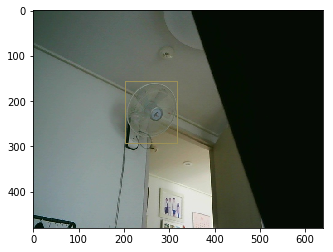

0

In [14]:
pred_dict = pred[0]

pred_boxes = pred_dict['boxes']
pred_labels = pred_dict['labels']
pred_scores = pred_dict['scores']


indices = pred_scores >=0.9
pred_boxes = pred_boxes[indices]
pred_labels = pred_labels[indices]
pred_scores = pred_scores[indices]

visualize_detection_result_without_label('../images/2024-03-05_13:24:45.403.jpg', pred_boxes, pred_labels, pred_scores)

In [2]:
model = torch.load("./fasterrcnn_restnet50_fpn.path")

In [7]:
cnn = model.backbone

In [3]:
device = (
"cuda"
)
img_path = '../images/2024-03-05_13:24:45.403.jpg'
print(f'Using device : {device}')
img_pil = Image.open(img_path).convert("RGB")
transform = T.Compose([T.ToTensor()])
img = transform(img_pil)
img = img.to(device)
batch_img = [img]

Using device : cuda


In [5]:
trans_img = model.transform(batch_img)

In [13]:
model.eval()
model(batch_img)

RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same

In [14]:
cnn.to(('cuda'))

BackboneWithFPN(
  (body): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): FrozenBatchNorm2d(64, eps=0.0)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): FrozenBatchNorm2d(64, eps=0.0)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): FrozenBatchNorm2d(64, eps=0.0)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): FrozenBatchNorm2d(256, eps=0.0)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): FrozenBatchNorm2d(256, eps=0.0)
        )
      )
      (1): Bottleneck(
        (conv1): C

In [15]:
cnn(batch_img)

TypeError: conv2d() received an invalid combination of arguments - got (list, Parameter, NoneType, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: ([31;1mlist[0m, [31;1mParameter[0m, [31;1mNoneType[0m, [31;1mtuple[0m, [31;1mtuple[0m, [31;1mtuple[0m, [32;1mint[0m)
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, str padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: ([31;1mlist[0m, [31;1mParameter[0m, [31;1mNoneType[0m, [31;1mtuple[0m, [31;1mtuple[0m, [31;1mtuple[0m, [32;1mint[0m)
